# Principal Component Analysis: Faces

BUSMGT 7247

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_lfw_people

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.svm import SVC

# Options for plots
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Seed the random number generator for reproducible results
random_state = 1000
np.random.seed(random_state)

In [2]:
# Data source: Labeled Faces in the Wild
lfw = fetch_lfw_people(min_faces_per_person=60)
print(lfw.images.shape)

y = lfw.target_names[lfw.target]
X = lfw.data

(1348, 62, 47)


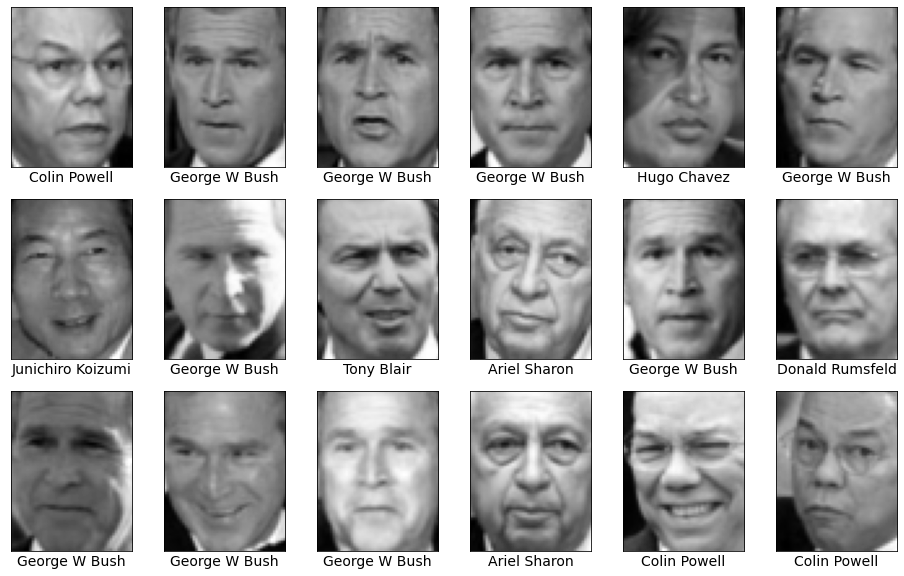

In [3]:
# Display images of first 18 faces
fig, axs = plt.subplots(3, 6, figsize=(16, 10))
for i, ax in enumerate(axs.flat):
    ax.imshow(lfw.images[i], cmap='gray')
    ax.set(xticks=[], yticks=[],
            xlabel=lfw.target_names[lfw.target[i]])

## Fit a Model on Original Dimensions

In [4]:
(X_train, X_test,
 y_train, y_test) = train_test_split(X, y, test_size=0.2,
                                     random_state=random_state)

In [5]:
# Fit a Gaussian SVM
svc_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='rbf'))
])

svc_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])

In [6]:
# Evaluate on test data
y_pred = svc_pipe.predict(X_test)
print(classification_report(y_test, y_pred))

                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.38      0.55        16
     Colin Powell       0.79      0.79      0.79        48
  Donald Rumsfeld       0.93      0.48      0.64        29
    George W Bush       0.65      0.99      0.79       105
Gerhard Schroeder       0.64      0.47      0.55        19
      Hugo Chavez       0.86      0.33      0.48        18
Junichiro Koizumi       1.00      0.62      0.77         8
       Tony Blair       1.00      0.59      0.74        27

         accuracy                           0.73       270
        macro avg       0.86      0.58      0.66       270
     weighted avg       0.79      0.73      0.72       270



## Reduce Dimensionality

In [7]:
# Scale and center the data prior to applying PCA
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
X_scale[:5]

array([[ 1.0050244 ,  0.91436267,  0.6292839 , ..., -1.4910041 ,
        -1.4065766 , -1.3338119 ],
       [-0.41931307, -0.8269849 , -0.714991  , ...,  1.6567609 ,
         1.6757917 ,  1.6750889 ],
       [-0.14156726,  0.07647574, -0.61043614, ..., -0.05361006,
         1.0542091 ,  1.7088021 ],
       [-0.48340827, -0.26596507,  0.49485645, ...,  1.4221712 ,
         1.4373765 ,  1.2747451 ],
       [-0.7326673 , -0.84155685, -1.1705507 , ..., -1.0687429 ,
        -0.97232026, -0.90818304]], dtype=float32)

In [8]:
# Automate selecting dimensions that represent at least 80% of variance
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_scale)

In [9]:
X_reduced.shape

(1348, 164)

In [10]:
X.shape

(1348, 2914)

## Fit a Model to Reduced Dimensions

In [11]:
(X_train, X_test,
 y_train, y_test) = train_test_split(X_reduced, y, test_size=0.2,
                                     random_state=random_state)

In [12]:
# Fit a Gaussian SVM
svc_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='rbf'))
])

svc_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])

In [13]:
# Evaluate on test data
y_pred = svc_pipe.predict(X_test)
print(classification_report(y_test, y_pred))

                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.44      0.61        16
     Colin Powell       0.91      0.85      0.88        48
  Donald Rumsfeld       1.00      0.41      0.59        29
    George W Bush       0.63      1.00      0.77       105
Gerhard Schroeder       0.85      0.58      0.69        19
      Hugo Chavez       1.00      0.28      0.43        18
Junichiro Koizumi       1.00      0.62      0.77         8
       Tony Blair       0.94      0.56      0.70        27

         accuracy                           0.74       270
        macro avg       0.92      0.59      0.68       270
     weighted avg       0.82      0.74      0.73       270

